In [40]:
import pandas as pd

import numpy as np

from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import GradientBoostingClassifier 

from sklearn.model_selection import train_test_split

from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import TimeSeriesSplit



from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectFromModel



from xgboost import plot_importance

from matplotlib import pyplot

import os

import openpyxl


In [41]:
class display(object):
    """Display HTML representation of multiple objects"""
    template = """<div style="float: left; padding: 10px;">
    <p style='font-family:"Courier New", Courier, monospace'>{0}</p>{1}
    </div>"""
    def __init__(self, *args):
        self.args = args
        
    def _repr_html_(self):
        return '\n'.join(self.template.format(a, eval(a)._repr_html_())
                         for a in self.args)
    
    def __repr__(self):
        return '\n\n'.join(a + '\n' + repr(eval(a))
                           for a in self.args)

In [57]:
# split data into train and test sets
seed =1992

strategyName='long'
algoName='xgb'
print(strategyName)



st='01-2007'
ed='03-2021'

isFullFeatures=True


if strategyName=='long':
 nTree=100
 learnRate=0.05
elif strategyName=='short':
 nTree=120
 learnRate=0.005

mxDepth=8

if algoName=='lgb':
  nLeaf=31
print('parameter model : ',nTree,'-',learnRate,'-',mxDepth)
    
    
splitN=3
option=2 
isShuffle=False  # if True  set random_state=xseed else None
# 1=time 2=KFold 3=StratifiedKFold

long
parameter model :  100 - 0.05 - 8


In [58]:

feat_path=r'd:\DataSets\xgb_s50f15m_featSelect2021.xlsx' 

if strategyName=='long':
  pathname=r'd:\DataSets\ML-Long_S50M15_07To1Q21.csv'
else :
  pathname=r'd:\DataSets\ML_LS\ML-Short_S50M15_07To1Q21.csv'

print(pathname)
print(feat_path)

d:\DataSets\ML-Long_S50M15_07To1Q21.csv
d:\DataSets\xgb_s50f15m_featSelect2021.xlsx


In [59]:
if algoName=='xgb':
 model = XGBClassifier(n_estimators=nTree,max_depth=mxDepth,learning_rate=learnRate,importance_type='gain')
elif algoName=='lgb':
 model=LGBMClassifier(n_estimators=nTree,learning_rate=learnRate,num_leaves=nLeaf)
 #model=LGBMClassifier(n_estimators=nTree,learning_rate=learnRate,num_leaves=nLeaf,max_depth=mxDepth)
else:
  model = GradientBoostingClassifier(n_estimators=nTree,max_depth=mxDepth,learning_rate=learnRate)


print(model)

XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=None, gamma=None,
              gpu_id=None, importance_type='gain', interaction_constraints=None,
              learning_rate=0.05, max_delta_step=None, max_depth=8,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              random_state=None, reg_alpha=None, reg_lambda=None,
              scale_pos_weight=None, subsample=None, tree_method=None,
              validate_parameters=None, verbosity=None)


In [60]:
filepath= os.path.abspath(pathname)

dataset =pd.read_csv(filepath,index_col="datetime", parse_dates=['datetime'],dayfirst=True)

dataset.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 75006 entries, 2007-01-03 09:45:00 to 2021-03-31 16:45:00
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   open                    75006 non-null  float64
 1   high                    75006 non-null  float64
 2   low                     75006 non-null  float64
 3   close                   75006 non-null  float64
 4   indy_ma-550             75006 non-null  float64
 5   indy_ma-1100            75006 non-null  float64
 6   indy_hh-550             75006 non-null  float64
 7   indy_ll-550             75006 non-null  float64
 8   indy_mid-550            75006 non-null  float64
 9   indy_hh2-1100           75006 non-null  float64
 10  indy_ll2-1100           75006 non-null  float64
 11  indy_mid2-1100          75006 non-null  float64
 12  indy_macd110-440        75006 non-null  float64
 13  indy_signal110-440-110  75006 non-null  float64
 14  ind

In [61]:
# x[-1] is lable always
label=dataset.columns[len(dataset.columns)-1]
print('label:',label)

label: LongSignal


In [62]:
if  isFullFeatures==True:
    print("FullFeatures")
    select_feat=np.array(dataset.columns )
else:
    print("SelectFeature")
    feat_path=os.path.abspath(feat_path)
    #print(os.path.exists(feat_path))
    feat_df=pd.read_excel(feat_path,header=None,engine='openpyxl',sheet_name=0)
    print('feature selection : ',feat_df)
    select_feat=feat_df.loc[:,0].tolist()
    select_feat.extend(['open','high','low','close'])
    select_feat.append(label)
    

print(select_feat)

FullFeatures
['open' 'high' 'low' 'close' 'indy_ma-550' 'indy_ma-1100' 'indy_hh-550'
 'indy_ll-550' 'indy_mid-550' 'indy_hh2-1100' 'indy_ll2-1100'
 'indy_mid2-1100' 'indy_macd110-440' 'indy_signal110-440-110'
 'indy_hist_macd110-440' 'indy_rsi25-ma20' 'indy_6ATRTrail_DC-110'
 'cate_3trend-550_ma110' 'cate_2trend-1100_ma220' 'cate_rannkHL1100-ma66'
 'cate_CombineTrend' 'LongSignal']


In [63]:
def CreateData(dfx):
    

  
 labelCol=dfx.columns[len(select_feat)-1]
 
 X_df_temp =dfx.drop(columns=['open','high','low','close',labelCol])
 Y_df_temp = dfx[labelCol]

 Xtemp=X_df_temp.to_numpy()
 ytemp=Y_df_temp.to_numpy()

 return X_df_temp,Y_df_temp, Xtemp,ytemp


In [64]:
df_train=dataset.loc[st:ed,select_feat]
#df_train.info()
X_df,Y_df,X,y=CreateData( df_train)

print(X_df.info())
print("============================")


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 75006 entries, 2007-01-03 09:45:00 to 2021-03-31 16:45:00
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   indy_ma-550             75006 non-null  float64
 1   indy_ma-1100            75006 non-null  float64
 2   indy_hh-550             75006 non-null  float64
 3   indy_ll-550             75006 non-null  float64
 4   indy_mid-550            75006 non-null  float64
 5   indy_hh2-1100           75006 non-null  float64
 6   indy_ll2-1100           75006 non-null  float64
 7   indy_mid2-1100          75006 non-null  float64
 8   indy_macd110-440        75006 non-null  float64
 9   indy_signal110-440-110  75006 non-null  float64
 10  indy_hist_macd110-440   75006 non-null  float64
 11  indy_rsi25-ma20         75006 non-null  float64
 12  indy_6ATRTrail_DC-110   75006 non-null  float64
 13  cate_3trend-550_ma110   75006 non-null  int64  
 14  cat

In [65]:
display('X_df.head(3)','X_df.tail(3)')

,indy_ma-550,indy_ma-1100,indy_hh-550,indy_ll-550,indy_mid-550,indy_hh2-1100,indy_ll2-1100,indy_mid2-1100,indy_macd110-440,indy_signal110-440-110,indy_hist_macd110-440,indy_rsi25-ma20,indy_6ATRTrail_DC-110,cate_3trend-550_ma110,cate_2trend-1100_ma220,cate_rannkHL1100-ma66,cate_CombineTrend
datetime,,,,,,,,,,,,,,,,,
2007-01-03 09:45:00,1.10,1.11,1.15,0.91,0.0022,1.15,0.91,0.0022,-22.50,-27.20,4.70,39.11,1.03,1,0,3,2
2007-01-03 10:00:00,1.09,1.10,1.14,0.89,0.0022,1.14,0.89,0.0022,-22.50,-27.19,4.68,39.05,1.02,1,0,3,2
2007-01-03 10:15:00,1.09,1.11,1.15,0.90,0.0022,1.15,0.90,0.0022,-22.53,-27.17,4.64,38.91,1.03,1,0,3,2
,indy_ma-550,indy_ma-1100,indy_hh-550,indy_ll-550,indy_mid-550,indy_hh2-1100,indy_ll2-1100,indy_mid2-1100,indy_macd110-440,indy_signal110-440-110,indy_hist_macd110-440,indy_rsi25-ma20,indy_6ATRTrail_DC-110,cate_3trend-550_ma110,cate_2trend-1100_ma220,cate_rannkHL1100-ma66,cate_CombineTrend
datetime,,,,,,,,,,,,,,,,,
2021-03-31 16:15:00,0.99,0.98,1.02,0.95,0.001,1.02,0.94,0.001,2.53,1.14,1.39,46.28,1.0,3,0,3,4
2021-03-31 16:30:00,0.99,0.98,1.02,0.95,0.001,1.02,0.94,0.001,2.58,1.12,1.46,46.08,1.0,3,0,3,4
2021-03-31 16:45:00,0.99,0.98,1.02,0.95,0.001,1.02,0.94,0.001,2.61,1.11,1.51,45.92,1.0,3,0,3,4


In [66]:

Y_df.tail(5)

datetime
2021-03-31 15:45:00    0
2021-03-31 16:00:00    0
2021-03-31 16:15:00    0
2021-03-31 16:30:00    0
2021-03-31 16:45:00    0
Name: LongSignal, dtype: int64

In [67]:
Y_df.value_counts()


0    44094
1    30912
Name: LongSignal, dtype: int64

In [68]:
#Encode label
#label_encoder = LabelEncoder()
#label_encoder = label_encoder.fit(y)
#label_encoded_Y = label_encoder.transform(y)

#print(label_encoded_Y.shape)
#label_encoded_Y[:10]

In [69]:


if isShuffle==False:
    xseed=None
else:
    xseed=1990


if option==1 :
 kfold =  TimeSeriesSplit(n_splits=splitN,max_train_size=None)
elif option==2:
 kfold = KFold(n_splits=splitN, shuffle=isShuffle, random_state=xseed)
else:
 kfold = StratifiedKFold(n_splits=splitN, shuffle=isShuffle, random_state=xseed)

print(kfold)

KFold(n_splits=3, random_state=None, shuffle=False)


In [70]:
#For TimeSplit
if option==1:
 for train, test in kfold.split(X):
    print("%s %s" % (train, test))
    
 df_Xtime=(df_train.reset_index())[['datetime',label]]
 print('train from ',df_Xtime.loc[0,'datetime'] ,' to test as follows')
    
 for train, test in kfold.split(X_df):
     print('test from ',df_Xtime.loc[test[0],'datetime'])  


# By cross_validate (Full option)

In [71]:
#result_cv = cross_validate(model, X, y, cv=kfold, scoring = ['accuracy','roc_auc'], return_estimator =True)
result_fullCV = cross_validate(model, X, y, cv=kfold, scoring = ['accuracy'], return_estimator =True)


In [72]:
sorted(result_fullCV.keys())

['estimator', 'fit_time', 'score_time', 'test_accuracy']

In [73]:
def print_format(f,x):
    print('Fold %2d    %4.6f' % (f, x))



In [74]:
def print_cv(scores):
    fold = [x + 1 for x in range(len(scores['test_accuracy']))]
    print('         Accuracy')  
    [print_format(f,x) for f,x in zip(fold, scores['test_accuracy'])]
                                       
    print('-' * 40)
    print('Mean       %4.6f' %  (np.mean(scores['test_accuracy'])))  
    print('Std        %4.6f' %  (np.std(scores['test_accuracy']  )))


print('By crossValidation Data')     
print_cv(result_fullCV)  

print("Which fold has the highest Acc?\n",result_fullCV['test_accuracy'].max())

By crossValidation Data
         Accuracy
Fold  1    0.820934
Fold  2    0.872610
Fold  3    0.811175
----------------------------------------
Mean       0.834907
Std        0.026957
Which fold has the highest Acc?
 0.8726101911847052


In [77]:
feature_importancesList=[]
for idx,estimator in enumerate(result_fullCV ['estimator']):
    #print("Features sorted by their score for estimator {}:".format(idx))
    feature_importances = pd.DataFrame(estimator.feature_importances_,
                                       index = X_df.columns,
                                        columns=['importance'])#.sort_values('importance', ascending=False)
    feature_importancesList.append(feature_importances)
    #print(feature_importances)

In [78]:
for i in range(splitN):
    feature_importancesList[i].rename(columns={'importance':f'impFeat{(i+1)}'},inplace=True)

df_feature_cv=pd.concat(feature_importancesList,axis=1)

df_feature_cv['SumFeatVal']=df_feature_cv.sum(axis=1)

df_feature_cv.sort_values(by='SumFeatVal',ascending=False)

,impFeat1,impFeat2,impFeat3,SumFeatVal
indy_ma-1100,0.235036,0.502646,0.612798,1.350479
indy_ma-550,0.410884,0.041852,0.011784,0.464520
indy_hh2-1100,0.075021,0.067790,0.104075,0.246887
indy_hh-550,0.022214,0.063748,0.014306,0.100268
cate_rannkHL1100-ma66,0.028533,0.043410,0.027460,0.099403
cate_3trend-550_ma110,0.031283,0.040808,0.016010,0.088102
indy_mid-550,0.025139,0.035106,0.025223,0.085468
cate_2trend-1100_ma220,0.024838,0.026144,0.032866,0.083848
indy_mid2-1100,0.024573,0.027417,0.030383,0.082374
indy_macd110-440,0.026999,0.031060,0.023839,0.081898


# By Split Validation and make predictions for test data and evaluate

In [60]:
print('By splitValidation Data') 
size_split=0.3

X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=isShuffle,test_size=size_split, random_state=seed)

model.fit(X_train,y_train)



By splitValidation Data


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.05, max_delta_step=0, max_depth=8,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [61]:

y_pred = model.predict(X_test)

predictions = [round(value) for value in y_pred]

accuracy = accuracy_score(y_test, predictions)

print("Accuracy: %.2f%%" % (accuracy * 100.0))


feature_series=pd.Series(model.feature_importances_, index=X_df.columns).sort_values(ascending=False)

print(feature_series)

Accuracy: 80.67%
indy_ma-1100              0.634500
indy_hh2-1100             0.098603
cate_2trend-1100_ma220    0.029460
cate_rannkHL1100-ma66     0.028863
indy_mid-550              0.025133
indy_mid2-1100            0.023140
indy_ll2-1100             0.022149
indy_macd110-440          0.021851
indy_signal110-440-110    0.021278
indy_hh-550               0.017316
indy_hist_macd110-440     0.014438
cate_3trend-550_ma110     0.013824
indy_ll-550               0.012384
indy_ma-550               0.012025
indy_6ATRTrail_DC-110     0.009698
cate_CombineTrend         0.007854
indy_rsi25-ma20           0.007484
dtype: float32


ImportError: You must install graphviz to plot tree

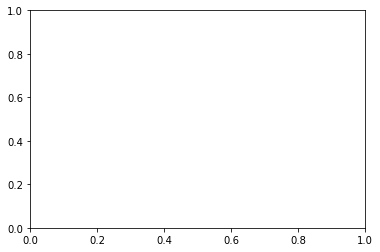

In [62]:
from xgboost import plot_tree
import matplotlib.pyplot as plt

plot_tree(model)
plt.show()


#https://stackoverflow.com/questions/53347010/graphviz-throws-errors-calling-view-function
#https://github.com/dask/dask-tutorial/issues/86